In [1]:
# inport functions file 
from functions import *

# high quality plots
%config InlineBackend.figure_format = 'retina'  

## **Burgers' Equation**

Solving the Burgers' equation using a physics-informed neural network.

Burgers': $\mathcal{N}[u(x, t)]=u_t+u u_x-\nu u_{x x}$

with conditions: 
\begin{aligned}
u(x, 0)=-\sin (\pi x), \quad &x \in[-1,1] . \\
u(-1, t)=0, \quad u(1, t)=0, \quad &t \in[0,1]
\end{aligned}

In [6]:
# Create the model
burgers_model = BURGERS(n_hidden_layers=4, n_neurons_per_layer=20, activation = nn.Tanh)

# print number of trainable parameters
num_trainable_params = sum(p.numel() for p in burgers_model.parameters() if p.requires_grad)
print(f"\nNumber of trainable parameters: {num_trainable_params}")

Using device: cuda

Domain setup complete with 10000 collocation points, 100 initial points, and 100 boundary points.

Number of trainable parameters: 1761


In [7]:
# Train the model
losses = burgers_model.train(adam_epochs=1000, lbfgs_epochs=50000, verbose = True)

Starting Adam optimization...
Adam - Epoch 0/1000, Loss: 5.493676e-01
Adam - Epoch 100/1000, Loss: 2.436594e-01
Adam - Epoch 200/1000, Loss: 1.461240e-01
Adam - Epoch 300/1000, Loss: 1.231648e-01
Adam - Epoch 400/1000, Loss: 1.023799e-01
Adam - Epoch 500/1000, Loss: 9.078428e-02
Adam - Epoch 600/1000, Loss: 8.549448e-02
Adam - Epoch 700/1000, Loss: 8.080409e-02
Adam - Epoch 800/1000, Loss: 7.541530e-02
Adam - Epoch 900/1000, Loss: 6.128697e-02
Adam - Epoch 999/1000, Loss: 4.501954e-02

Starting L-BFGS optimization...
L-BFGS - Iteration 100, Loss: 1.093445e-02
L-BFGS - Iteration 200, Loss: 4.280801e-03
L-BFGS - Iteration 300, Loss: 2.016453e-03
L-BFGS - Iteration 400, Loss: 1.140263e-03
L-BFGS - Iteration 500, Loss: 6.479201e-04
L-BFGS - Iteration 600, Loss: 4.590750e-04
L-BFGS - Iteration 700, Loss: 3.035041e-04
L-BFGS - Iteration 800, Loss: 2.044377e-04
L-BFGS - Iteration 900, Loss: 1.643839e-04
L-BFGS - Iteration 1000, Loss: 1.315691e-04
L-BFGS - Iteration 1100, Loss: 1.021087e-04
L-

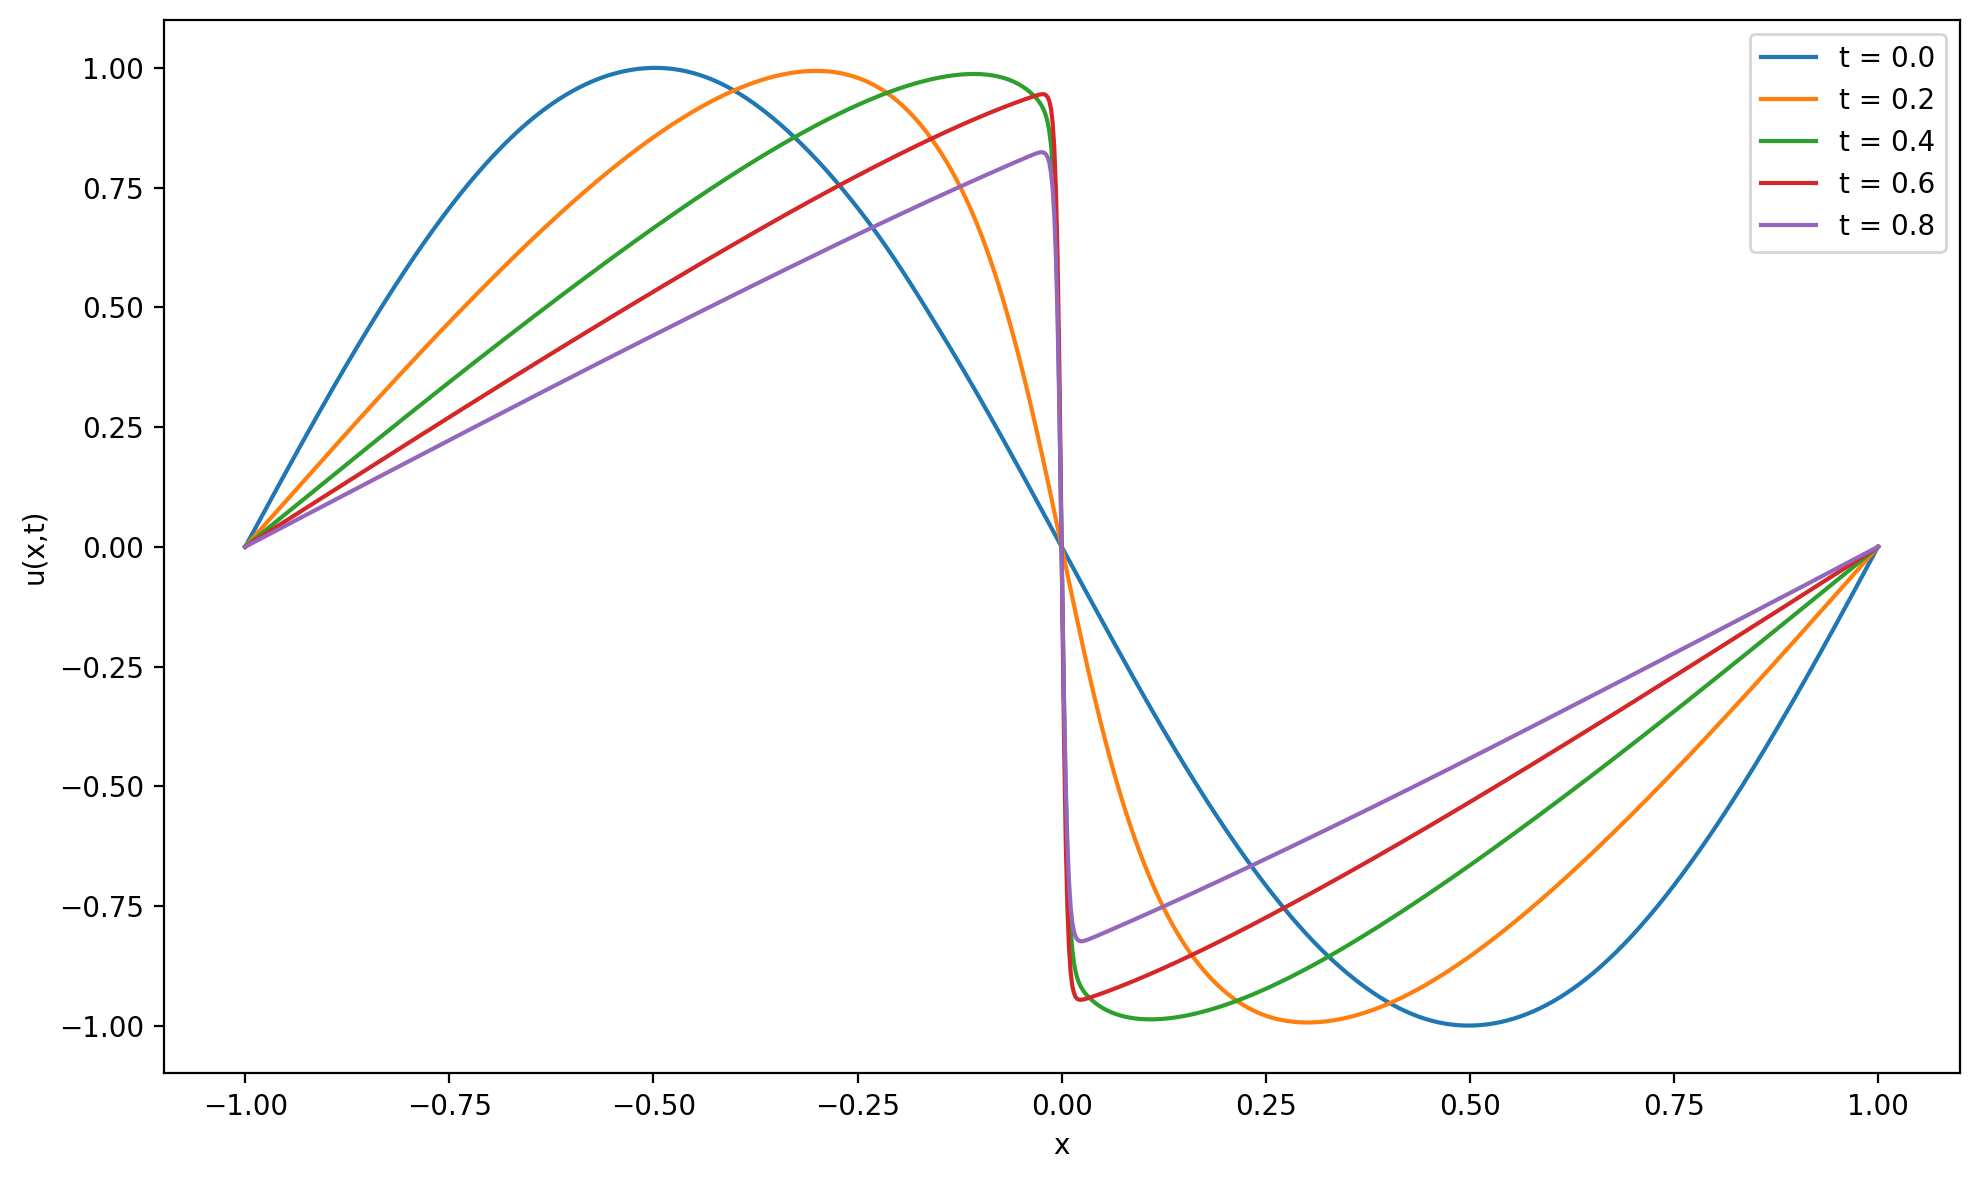

In [8]:
burgers_model.plot_profiles()

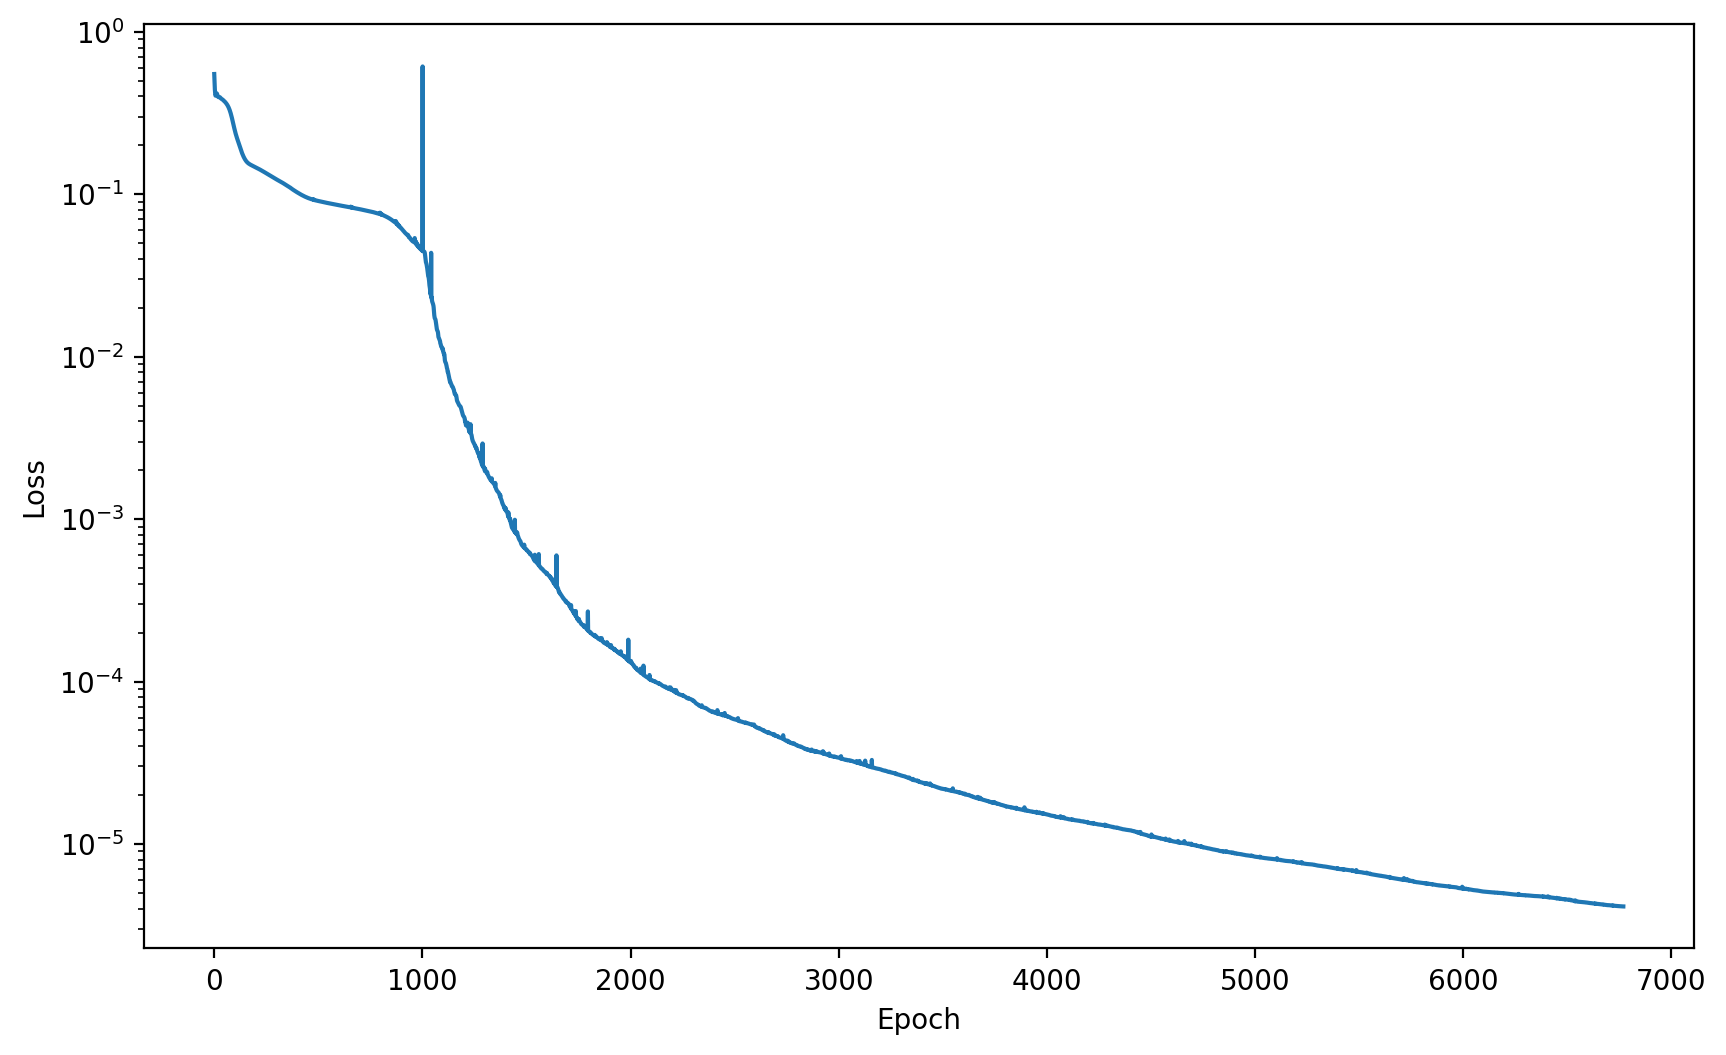

In [9]:
burgers_model.plot_losses(losses)

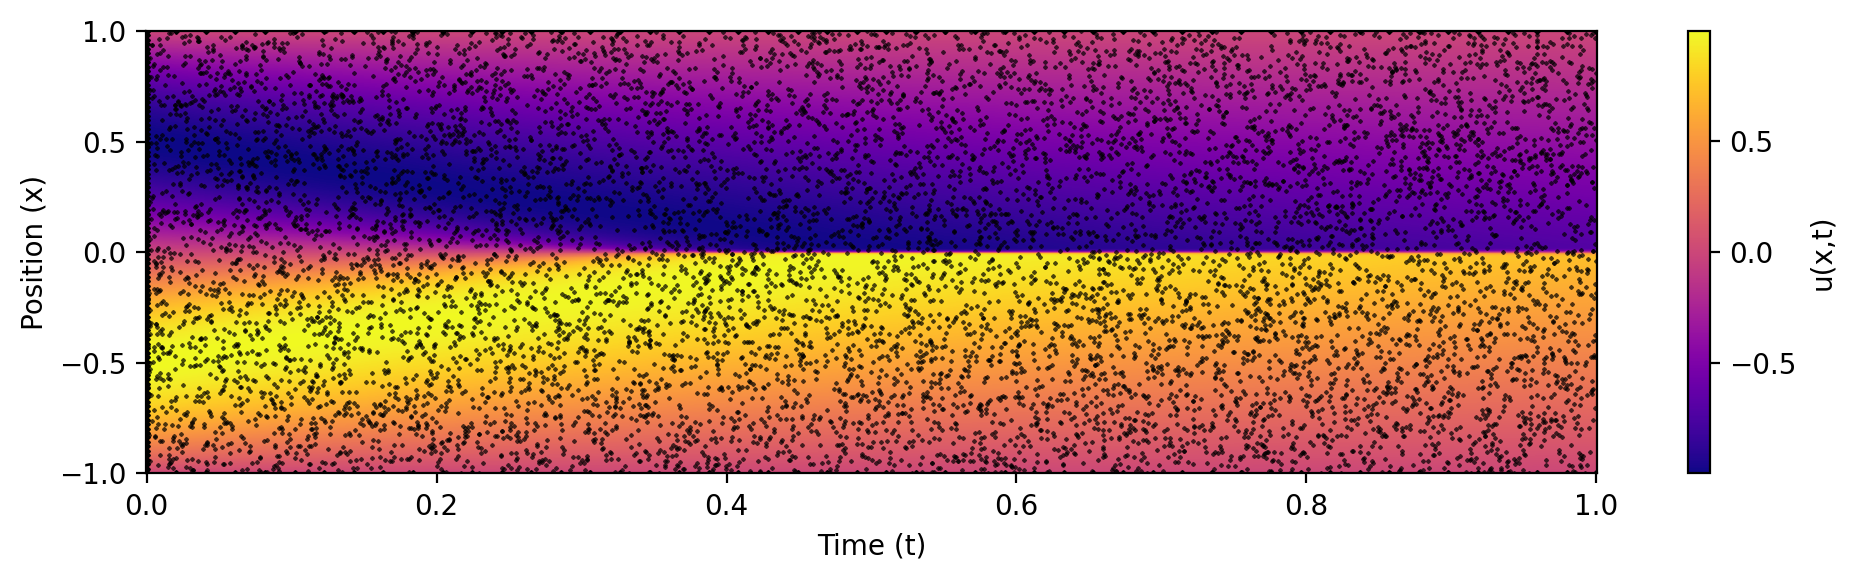

In [10]:
burgers_model.plot_spacetime(show_data = True)

In [11]:
burgers_model.test()

Evaluating PINN performance on a 1000×1000 grid...
PDE Loss: 7.802611e-06
Initial Condition Loss: 2.458262e-07
Boundary Condition Loss: 3.887765e-08
Total Loss: 8.087315e-06


8.08731510915095e-06

Animation saved to burgers_solution.gif


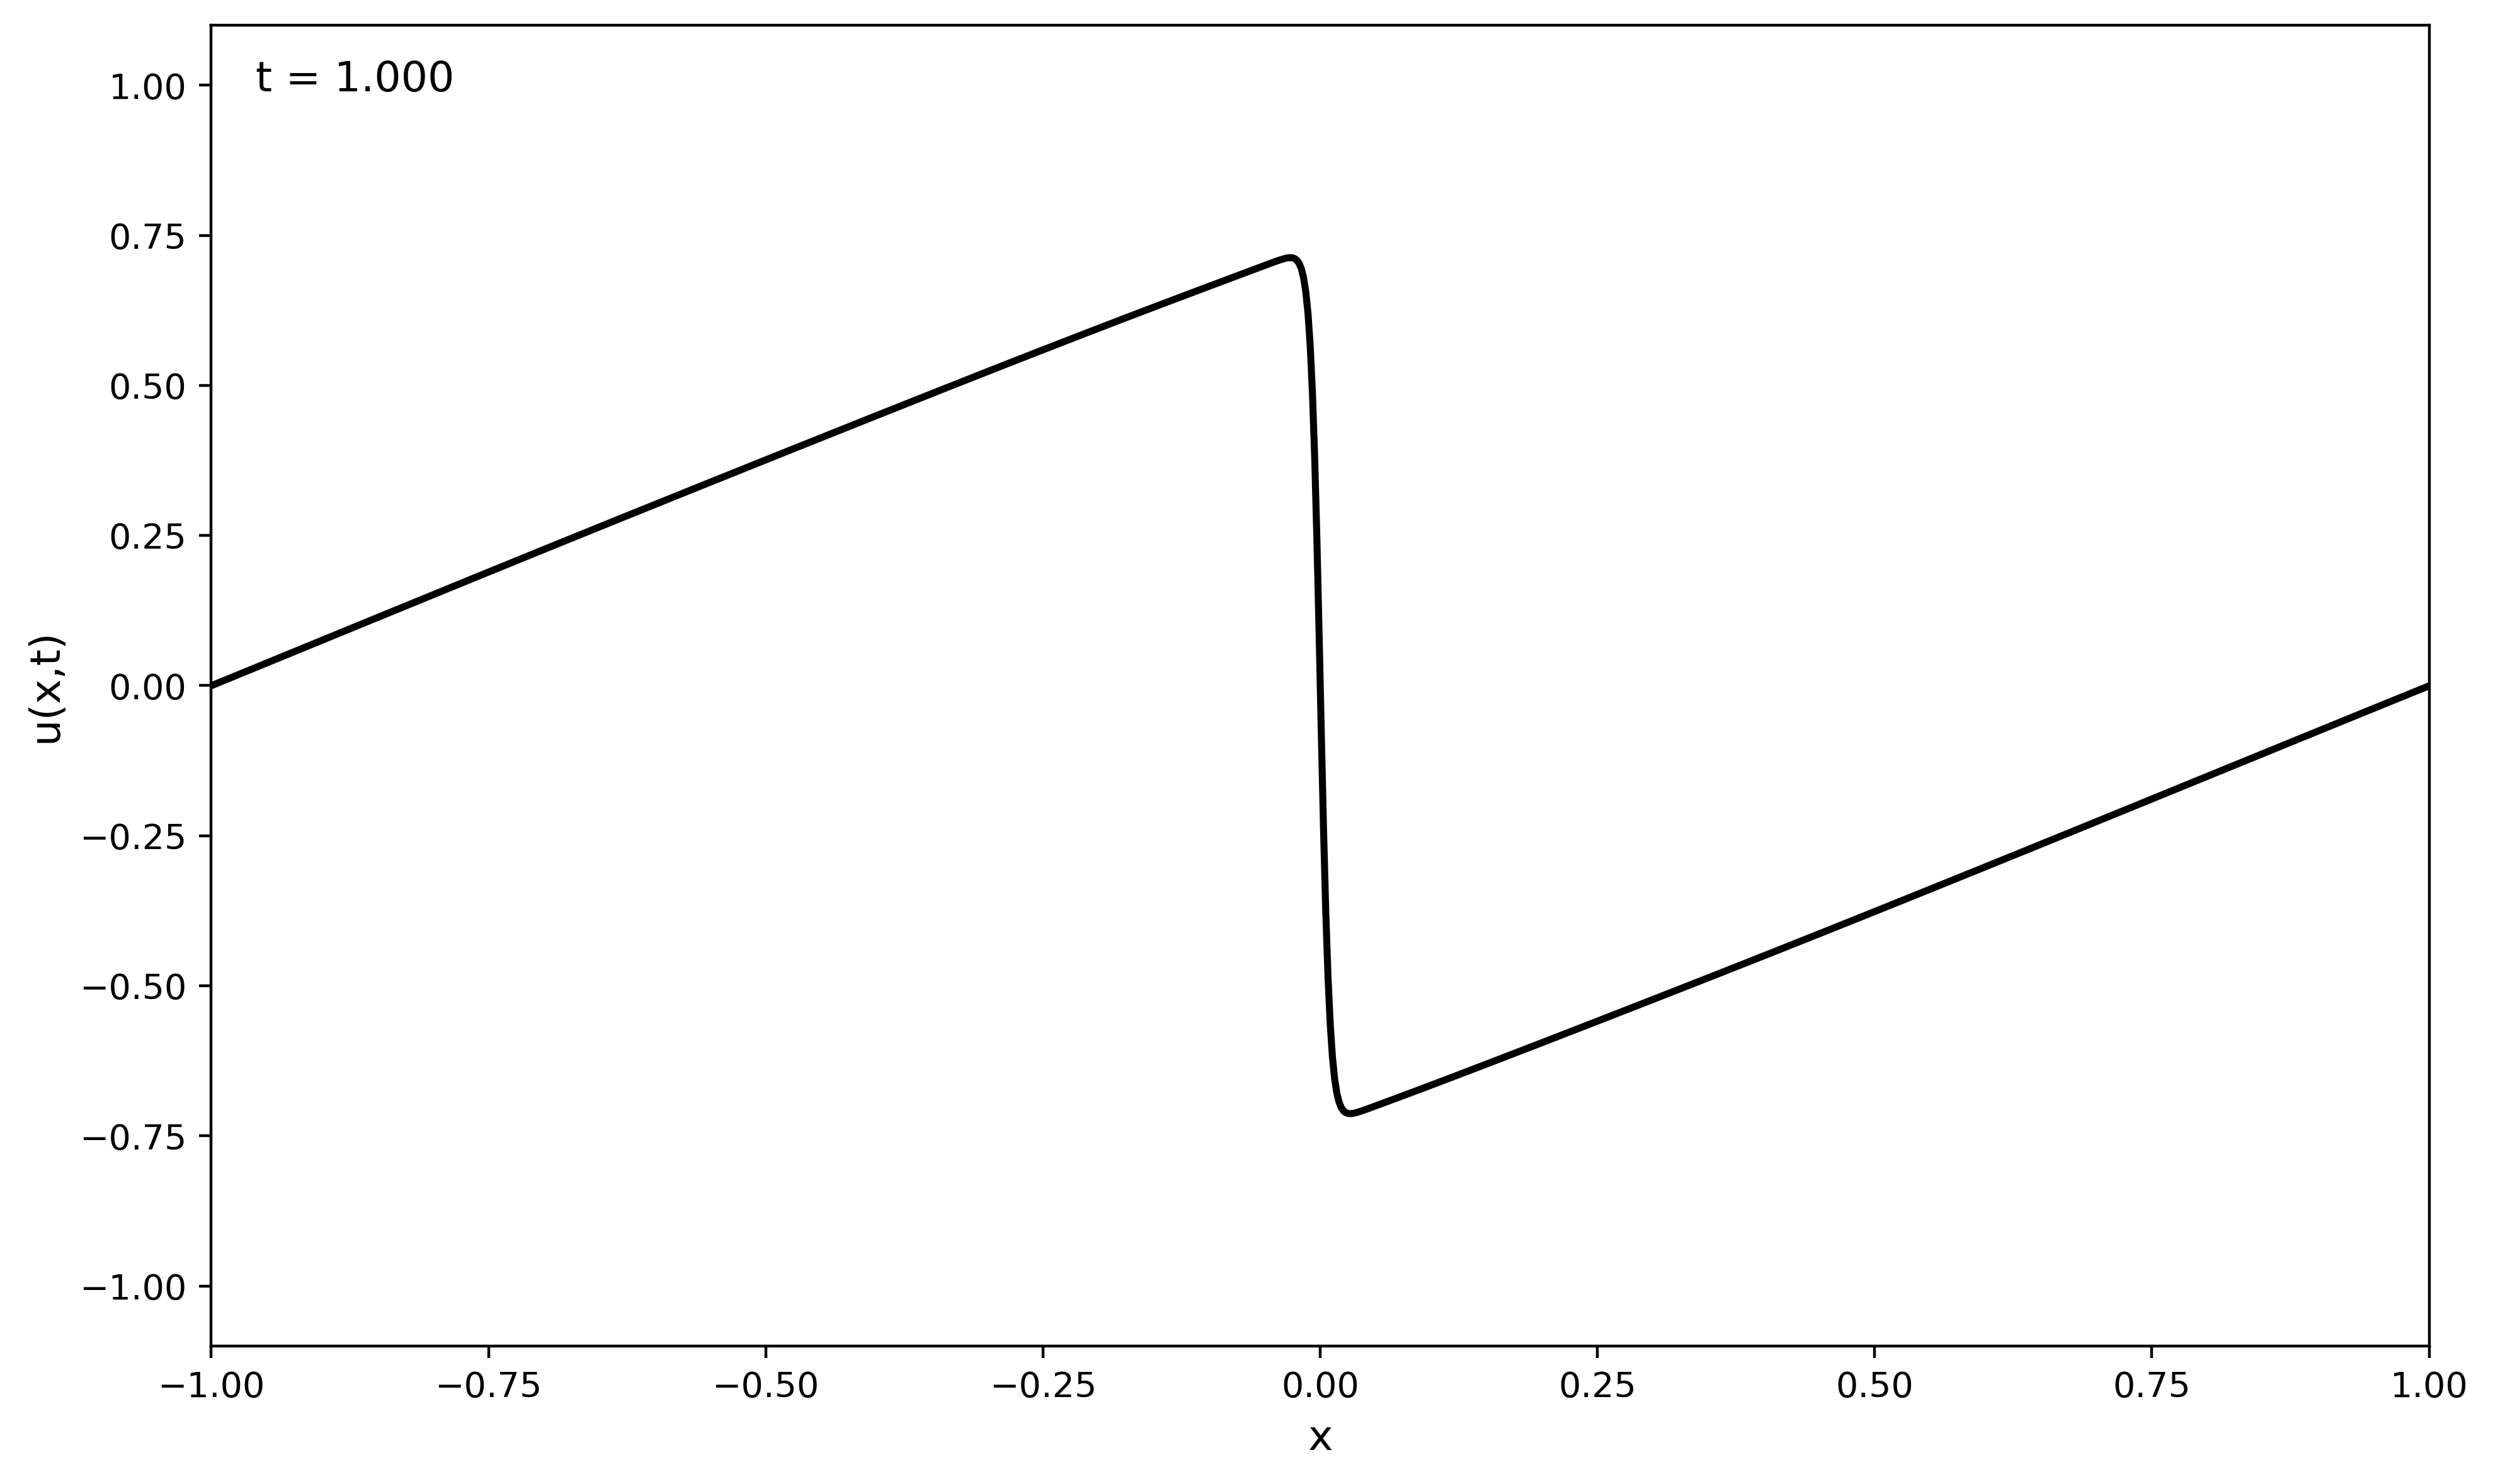

In [8]:
burgers_model.animate_solution(save_path = 'burgers_solution.gif')